<a href="https://colab.research.google.com/github/gkdivya/CNN/blob/master/1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


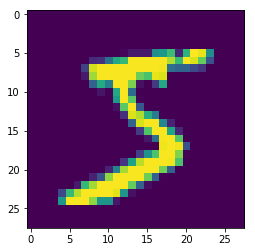

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation, Dropout, Flatten, BatchNormalization
from keras.optimizers import Adam

model = Sequential()

model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(16, 1))
#model.add(BatchNormalization()) #Trial commenting 0.9913
model.add(Convolution2D(16, 3, 3))
#model.add(BatchNormalization())
model.add(Convolution2D(16, 1))
#model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.25)) #99.06
model.add(Convolution2D(16, 1, activation='relu'))
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_136 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_18 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_19 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_138 (Conv2D)          (None, 22, 22, 16)        2320      
_________________________________________________________________
dropout_16 (Dropout)         (None, 22, 22, 16)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 11, 11, 16)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.002),
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=500, nb_epoch=30, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/30
60000/60000 [==============================] - 5s 79us/step - loss: 0.0222 - acc: 0.9930
Epoch 2/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.0191 - acc: 0.9940
Epoch 3/30
60000/60000 [==============================] - 2s 42us/step - loss: 0.0171 - acc: 0.9949
Epoch 4/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.0156 - acc: 0.9951
Epoch 5/30
60000/60000 [==============================] - 2s 42us/step - loss: 0.0162 - acc: 0.9946
Epoch 6/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.0152 - acc: 0.9950
Epoch 7/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.0130 - acc: 0.9956
Epoch 8/30
60000/60000 [==============================] - 2s 42us/step - loss: 0.0136 - acc: 0.9955
Epoch 9/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.0140 - acc: 0.9952
Epoch 10/30
60000/60000 [==============================] - 2s 42us/step - loss: 0.0124 - acc: 0.9961

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.02132437391539097, 0.9942]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.31397023e-13 1.24564714e-09 6.79605971e-09 9.17166609e-09
  2.01044422e-13 4.26302656e-12 4.05559804e-20 1.00000000e+00
  3.66663893e-13 3.99203393e-10]
 [3.20364161e-05 8.86400642e-07 9.99966979e-01 6.50211496e-10
  5.04394926e-09 1.04315745e-09 1.44750757e-07 7.60832109e-12
  1.83959212e-08 3.88151677e-10]
 [5.15373744e-09 9.99971509e-01 8.85601494e-08 5.23255359e-08
  3.84032546e-06 3.92451227e-09 1.09877052e-09 2.45368992e-05
  9.49468060e-09 9.23632371e-09]
 [9.99992490e-01 6.36917992e-12 6.04327909e-07 3.31495040e-11
  4.23723856e-09 2.88395707e-09 6.39200562e-06 3.99414009e-12
  2.73342806e-07 1.56420029e-07]
 [3.75974724e-10 2.10141593e-08 6.54480137e-10 3.39016981e-10
  9.99987364e-01 1.37715084e-09 5.38402318e-08 6.33225170e-08
  6.92736890e-09 1.25020997e-05]
 [2.74743450e-09 9.99933720e-01 1.01703755e-07 2.32686688e-08
  2.71765271e-06 2.17313306e-10 2.31147518e-10 6.33810268e-05
  6.55086030e-09 5.42329781e-09]
 [7.92372071e-12 1.52077439e-06 3.26885328e-08 1.00443676e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_100'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored